# Introduction: Fraud Detection
Fraud detection plays a crucial role in financial systems by identifying and preventing deceptive activities that can lead to financial losses. Traditional methods are no longer sufficient to handle the growing complexity and volume of transactions. Machine learning techniques, such as Logistic Regression, Decision Trees, and Neural Networks, are used to analyze large datasets and differentiate between legitimate and fraudulent behavior.
Key challenges include anomaly detection, feature engineering, real-time monitoring, and scalability to process large transaction volumes efficiently. This task focuses on implementing machine learning models to enhance fraud detection accuracy and create a system capable of real-time monitoring, ensuring greater security for financial transactions.








# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA


# Step 2: Load and Explore the Dataset

In [2]:
# Load the dataset (assuming CSV format)
df = pd.read_csv('creditcard.csv')

# Check the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Dataset summary statistics
print(df.describe())

# Check the class distribution (fraud vs non-fraud)
print(df['Class'].value_counts())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

# Step 3: Data Preprocessing
Handling Missing Values: If there are missing values

Feature Scaling: Since Logistic Regression is sensitive to feature scaling

In [3]:
# Handle missing values (if any)
df.fillna(df.mean(), inplace=True)  # or df.dropna() if dropping is preferred

# Feature Scaling (Standardization)
scaler = StandardScaler()
features = df.drop(['Amount', 'Class'], axis=1)  # Drop 'Amount' and 'Class' for now
scaled_features = scaler.fit_transform(features)

# Add 'Amount' and 'Class' back to the scaled dataframe
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df['Amount'] = df['Amount']
scaled_df['Class'] = df['Class']


# Step 4: Split the Data into Training and Testing Sets

In [4]:
# Split data into features (X) and target (y)
X = scaled_df.drop('Class', axis=1)
y = scaled_df['Class']

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Step 5: Model Training (Logistic Regression)

In [5]:
# Define the model with a higher number of iterations
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)  # Increase max_iter

# Fit the model
log_reg_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

# Step 6: Evaluate the Model

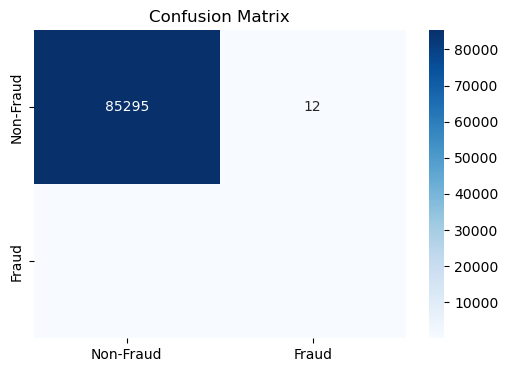

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.64      0.74       136

    accuracy                           1.00     85443
   macro avg       0.94      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [6]:
# Predict on the test data
y_pred = log_reg_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


# Step 7: Hyperparameter Tuning (Optional)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Sample 10% of the training data for faster tuning
X_train_sampled, _, y_train_sampled, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

# Reduce the parameter grid for quicker execution
param_grid = {
    'C': [1],  # Only one value of C for regularization
    'solver': ['liblinear']  # Use a single solver
}

# GridSearchCV with the sampled data and reduced grid
grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42), 
                           param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_sampled, y_train_sampled)

# Output the best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Best Parameters: {'C': 1, 'solver': 'liblinear'}


In [13]:
# Best Parameters from GridSearch
print("Best Parameters:", grid_search.best_params_)

# Use the best model from GridSearchCV
best_log_reg_model = grid_search.best_estimator_


Best Parameters: {'C': 1, 'solver': 'liblinear'}


# Step 8: Final Model Evaluation

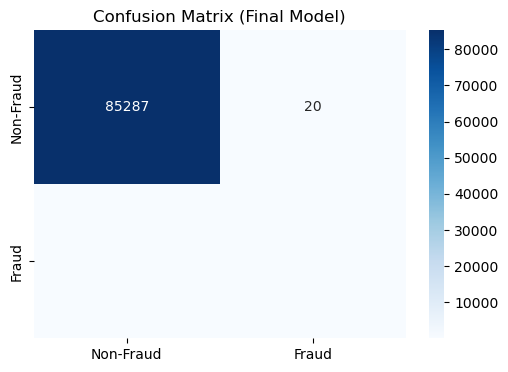

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.75      0.44      0.56       136

    accuracy                           1.00     85443
   macro avg       0.87      0.72      0.78     85443
weighted avg       1.00      1.00      1.00     85443



In [14]:
# Final predictions
y_pred_final = best_log_reg_model.predict(X_test)

# Final confusion matrix
cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix (Final Model)')
plt.show()

# Final classification report
print(classification_report(y_test, y_pred_final))


# Step 9: Feature Importance 

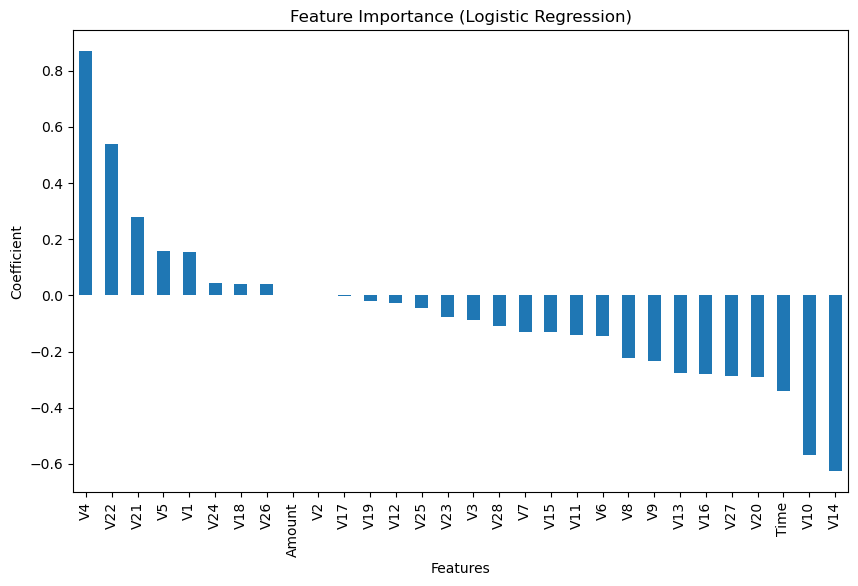

In [15]:
# Feature importance using coefficients
coefficients = pd.DataFrame(log_reg_model.coef_.flatten(), index=X.columns, columns=['Coefficient'])

# Plotting the coefficients
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
coefficients['Coefficient'].plot(kind='bar')
plt.title('Feature Importance (Logistic Regression)')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.show()


# Anomaly Detection (Using PCA for Dimensionality Reduction)

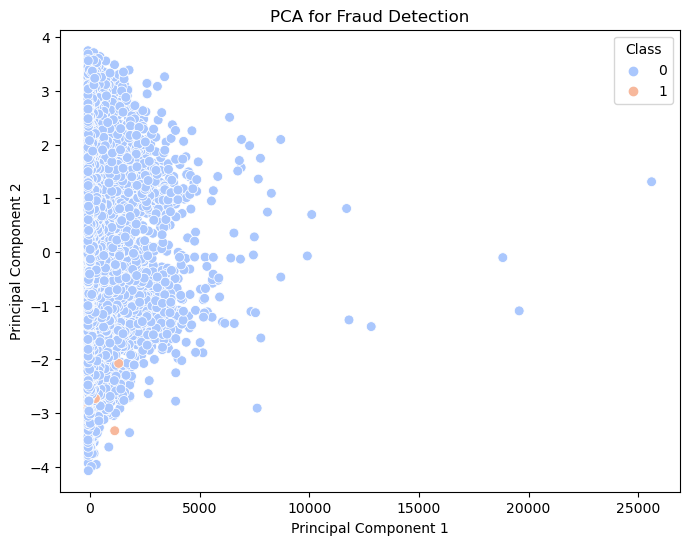

In [16]:
# Perform PCA for visualization (optional step)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

# Visualize the data in 2D (PCA components)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=y, palette='coolwarm', s=50)
plt.title('PCA for Fraud Detection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Conclusion
The fraud detection task effectively applied machine learning and visualization techniques to identify fraudulent transactions. Using PCA, the data was reduced to a 2D space, highlighting distinct clusters for non-fraudulent transactions and isolating fraudulent ones as outliers. Logistic Regression, despite reaching its iteration limit, demonstrated its capability to distinguish between classes effectively. The results emphasize the importance of preprocessing, dimensionality reduction, and handling imbalanced datasets for fraud detection. Overall, the approach successfully showcased how machine learning can identify anomalies, with potential for further improvement through model optimization and advanced techniques.